In [1]:
### Training Neural Networks
# including helper functionalities
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                               ])
# Download and load the training data
trainset = datasets.MNIST('~/PyTorchChallenge/MNIST_dara/', download = True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [3]:
# Build a feed forward network
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10)
                     )
# define the loss 
criterion = nn.CrossEntropyLoss()

# Get our Data
images, labels = next(iter(trainloader))

# Flatten the images
images = images.view(images.shape[0], -1)


# Forward pass, get our logits
logits = model(images)

# Calculate the loss with the logits and labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3094, grad_fn=<NllLossBackward>)


In [4]:
## Building a feed forward network
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim = 1)
                     )
# define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2961, grad_fn=<NllLossBackward>)


In [5]:
# autograd
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0028, -0.0028, -0.0028,  ..., -0.0028, -0.0028, -0.0028]])


In [6]:
### Training the network

In [7]:
from torch import optim

#optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [8]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0055, -0.0175, -0.0210,  ...,  0.0220,  0.0062, -0.0016],
        [-0.0303,  0.0034,  0.0050,  ..., -0.0109,  0.0087, -0.0248],
        [ 0.0083,  0.0217, -0.0159,  ...,  0.0086,  0.0199, -0.0267],
        ...,
        [-0.0050, -0.0163, -0.0170,  ...,  0.0330,  0.0341, -0.0301],
        [ 0.0178,  0.0159,  0.0215,  ...,  0.0104, -0.0288,  0.0172],
        [ 0.0312,  0.0281, -0.0270,  ..., -0.0190, -0.0058, -0.0338]],
       requires_grad=True)
Gradient - tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [-0.0052, -0.0052, -0.0052,  ..., -0.0052, -0.0052, -0.0052]])


In [9]:

# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)


Updated weights -  Parameter containing:
tensor([[ 0.0055, -0.0175, -0.0210,  ...,  0.0220,  0.0062, -0.0016],
        [-0.0303,  0.0034,  0.0050,  ..., -0.0109,  0.0087, -0.0248],
        [ 0.0083,  0.0217, -0.0159,  ...,  0.0086,  0.0199, -0.0267],
        ...,
        [-0.0050, -0.0163, -0.0170,  ...,  0.0330,  0.0340, -0.0301],
        [ 0.0178,  0.0159,  0.0215,  ...,  0.0104, -0.0288,  0.0172],
        [ 0.0312,  0.0281, -0.0270,  ..., -0.0189, -0.0058, -0.0337]],
       requires_grad=True)


In [10]:
### Training for real

In [11]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                    )
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.0318572866573517
Training loss: 0.3820164872289721
Training loss: 0.3238645542277964
Training loss: 0.292913393488825
Training loss: 0.26850275350595587


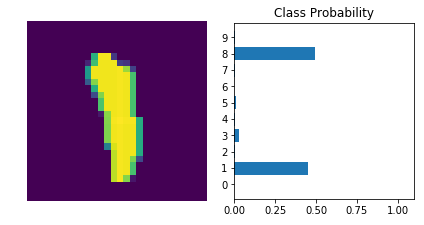

In [12]:
# with the network trained, we can check out its predictions
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

# turn of gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    
# output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1,28,28), ps)